In [86]:
import numpy as np
import pandas as pd
from scipy.stats import multivariate_normal
import matplotlib.pyplot as plt

# carregar dataset
data = pd.read_csv("data/data_bayesian_question.csv", header=None)

N = len(data) # numero de amostras

coord = data.iloc[:, :2].values
# print(coord[:5])
labels = data.iloc[:, 2].values
# print(labels[:5])

# probabilidades a priori
# p(C_{+1})
p1 = 0.7
# p(C_{-1})
p2 = 0.3

# montando as gaussianas bivariadas
# p(x|C_{+1})
mu1 = np.array([6, -4])
cov1 = np.array([[1, 1],[1, 4]])
x1 = multivariate_normal(mean = mu1, cov = cov1)
# p(x|C_{-1})
mu2 = np.array([0.5, 2.5])
cov2 = np.array([[4, -2.4],[-2.4, 9]])
x2 = multivariate_normal(mean = mu2, cov = cov2)

# discriminant functions
g1 = p1 * np.array(x1.pdf(coord))
g2 = p2 * np.array(x2.pdf(coord))

# predicao
# caso for positivo, classe +1
# caso for negativo, classe -1
pred = g1 - g2
# print(len(gxy))

# avaliando taxa de erro
error = 0
for i in range(len(pred)):
    if pred[i] > 0:   
        if labels[i] != 1:
            error += 1
    else:
        if labels[i] != -1:
            error += 1

taxa_error = error*100/N
print("Erro de predição = "+str(round(taxa_error, 2)) + "% ("+ str(error) + "/" + str(N) +")")

Erro de predição = 0.77% (23/3000)


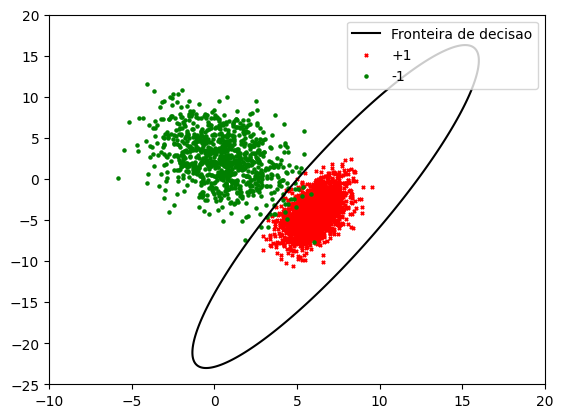

In [87]:
# gerar dados aleatorios para avaliar a fronteira de decisao
x = np.linspace(-10, 20, 1000)
y = np.linspace(-25, 20, 1000)

# gerando coordenadas
X, Y = np.meshgrid(x, y)
xy = np.dstack((X, Y))

# discriminant functions
g1 = p1 * np.array(x1.pdf(xy))
g2 = p2 * np.array(x2.pdf(xy))

pred = g1 - g2
# print(pred[:5, :5])

# avaliando os pontos da fronteira de decisao
# levels=[0] somente considera os valores preditos que sao proximos de 0
plt.contour(X, Y, pred, levels=[0], colors='black')
plt.plot([],[], color='black', label='Fronteira de decisao')


# para plotar os pontos do dataset podemos fazer
plt.scatter(coord[labels == 1, 0], coord[labels == 1, 1], color='red', s=5, label='+1', marker='x')
plt.scatter(coord[labels == -1, 0], coord[labels == -1, 1], color='green', s=5, label='-1', marker='o')

plt.legend()
plt.show()